In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

In [2]:
from random import uniform

def sample(pi):
    a = 0.0
    U = uniform(0,1)
    for i in range(len(pi)):
        if a < U <= a + pi[i]:
            return i
        a += pi[i]
        
class MarkovChain:
    def __init__(self, p=None, X=None):
        self.p, self.X = p, X
        
    def update(self):
        self.X = sample(self.p[self.X])
        
    def sample_path(self, n):
        path = []
        for i in range(n):
            path.append(self.X)
            self.update()
        return path

In [4]:
# Simulation parameters 
T = 100
sigma = 1
rho = 0.5

# Tauchen chain
s = sigma / np.sqrt(1-rho**2)
p_tauchen = (1 + rho) / 2
P = [[p_tauchen, 1-p_tauchen], [1-p_tauchen, p_tauchen]]
pi_tauchen = [p_tauchen, 1-p_tauchen]

tauchen_chain = MarkovChain(p=P, X=sample(pi_tauchen))

# Chain sample path
tauchen_path = tauchen_chain.sample_path(T)

# Chain acf
tauchen_acf = acf(tauchen_path)

# AR(1) sample path
y_path = [s]
for t in range(T):
    y_path.append(rho*y_path[t] + np.random.normal())

# AR(1) acf
ar1_acf = acf(y_path)

/Users/danielmpfeffer/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


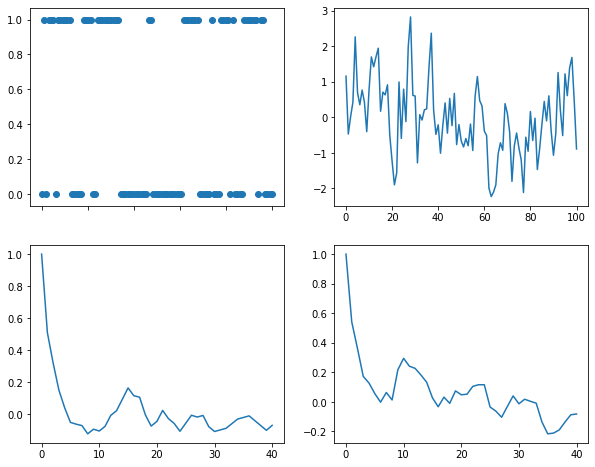

In [7]:
plt.figure(figsize=(10,8))

ax1 = plt.subplot(221)
plt.scatter(np.linspace(0, T, T), tauchen_path)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(222, sharex=ax1)
plt.plot(y_path)

ax3 = plt.subplot(223)
plt.plot(tauchen_acf)

ax4 = plt.subplot(224)
plt.plot(ar1_acf)

plt.savefig('q1-sim')